In [1]:
import cooler
import h5py
from TAD_Laplacian import *
import pandas as pd


#extracting limits of chromosomes (in bins)
def extract_chrom_limits(cool):
    cool_df = pd.DataFrame(cool.bins()[:])
    chromdict = {}
    chromnames = cool.chromnames
    for chrom in chromnames:
        indexes = cool_df[cool_df['chrom']==chrom].index
        start = indexes[0]
        end = indexes[-1]
        chromdict.update({chrom:(start, end+1)})
    return chromdict

# single cell Hi-C example

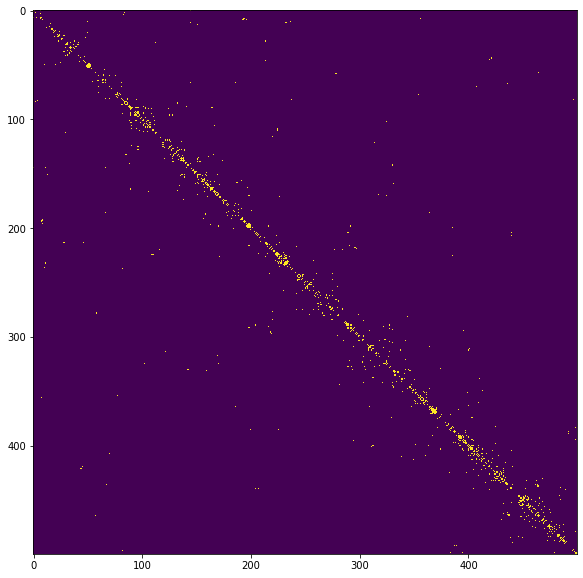

In [2]:
#load data by cooler
data = cooler.Cooler('./data/single_cell_drozophila_10000.cool')
#extract limits of chromosomes
chromdict = extract_chrom_limits(data)

bal = False #Unbalanced case
#Check the chromosome "chr2L" 
start = chromdict['chr2L'][0] 
end = chromdict['chr2L'][1]
size = end - start
#convert from cooler to numpy matrix
mat = np.array(data.matrix(balance=bal, sparse=True)[start:end, start:end].toarray(), ndmin = 2)

#look
plt.figure(figsize=(10,10))
plt.imshow(mat[:500,:500], vmin=0, vmax=1)

Converged in 2 iterations
0.01598628187102704


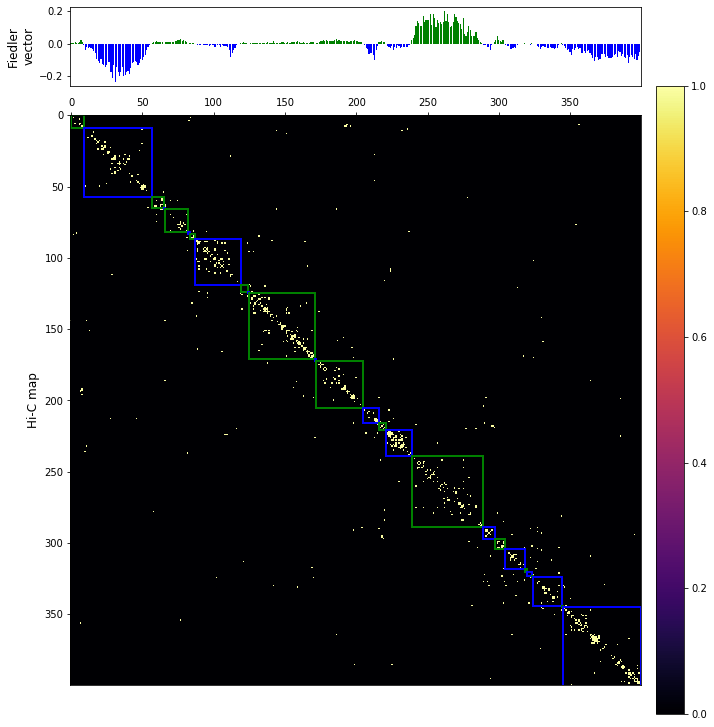

In [3]:
#Let's find TADs by Fiedler vector (graph Laplacian) approach
H = mat[:400,:400] #Since the procedure of normalization 
                    #is pure defined for single-cell data 
                    #we will use raw data directly

tad = TAD_Laplacian()
tad.fit(H, precision=1, 
        toeplitz=False, #Note that we don't need diagonal normalization for single-cell case
        recursive=True, #use algorithm recursively
        minlimit=10,    #minimum number of bins after which no decomposing more
        threshold=0.04) #maximum number of fiedler value (graph connectivity metric) to stop decomposing   
print(tad.fiedler_val_it1)
tad.visualize()

# Example with cell population Hi-C data

/home/shappiron/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


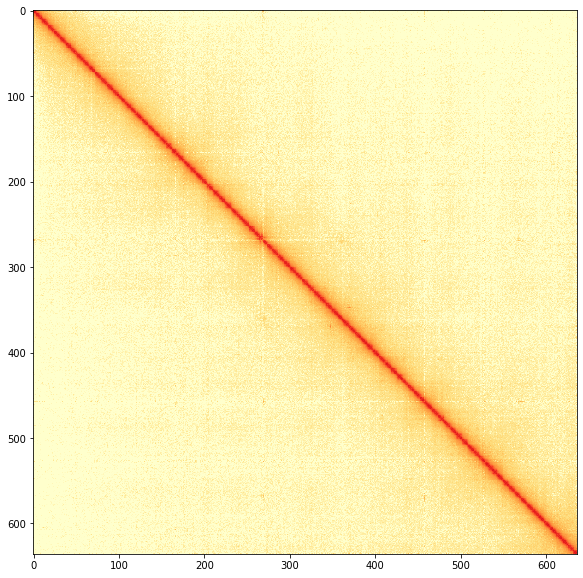

In [4]:
#load data by cooler
data = cooler.Cooler('./data/dicty_10000.cool')
#extract limits of chromosomes
chromdict = extract_chrom_limits(data)

bal = True #Balanced case
#Check the chromosome "chr2L" 
start = chromdict['chr3'][0] 
end = chromdict['chr3'][1]
size = end - start
#convert from cooler to numpy matrix
mat = np.array(data.matrix(balance=bal, sparse=True)[start:end, start:end].toarray(), ndmin = 2)

#Now we need to transform our initial data for better visualization
trans_func = lambda x: np.where(x!=0, np.log10(x), -5)

#look
plt.figure(figsize=(10,10))
plt.imshow(trans_func(mat), vmin=-4, vmax=0, cmap='YlOrRd')

Try **threshold = 1.1** and **minlimit = 150**

Converged in 2 iterations
0.8011588904923278


/home/shappiron/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


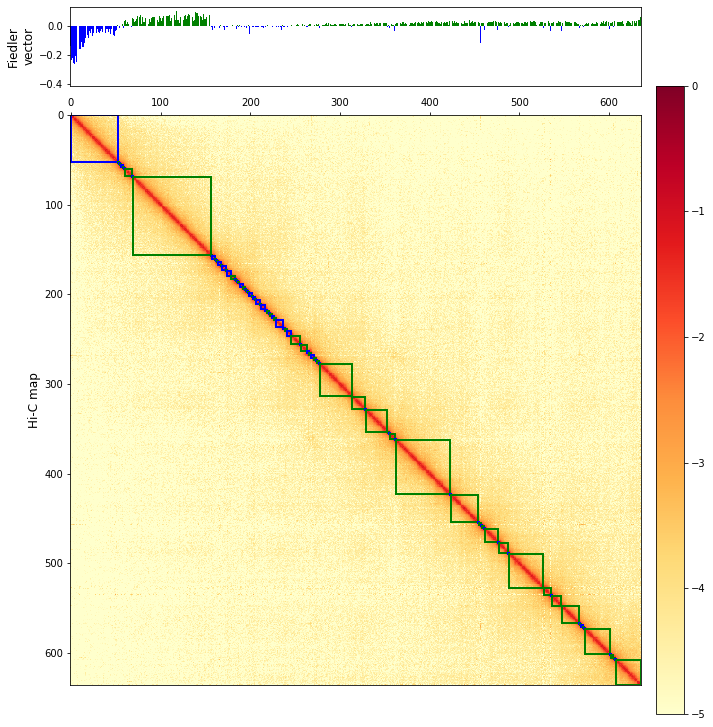

In [8]:
#Let's find TADs by Fiedler vector (graph Laplacian) approach
H = mat

tad = TAD_Laplacian()
tad.fit(H, precision=0, 
        toeplitz=True, 
        recursive=True, 
        minlimit=150,
        threshold=1.1)    #minimum number of bins after which no decomposing more
print(tad.fiedler_val_it1)
tad.visualize(transform_func=trans_func, cmap='YlOrRd', vmin=-4, vmax=0)

Now let's try **threshold = 0.8** and **minlimit = 20**

Converged in 1 iterations
0.8011588904923278


/home/shappiron/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


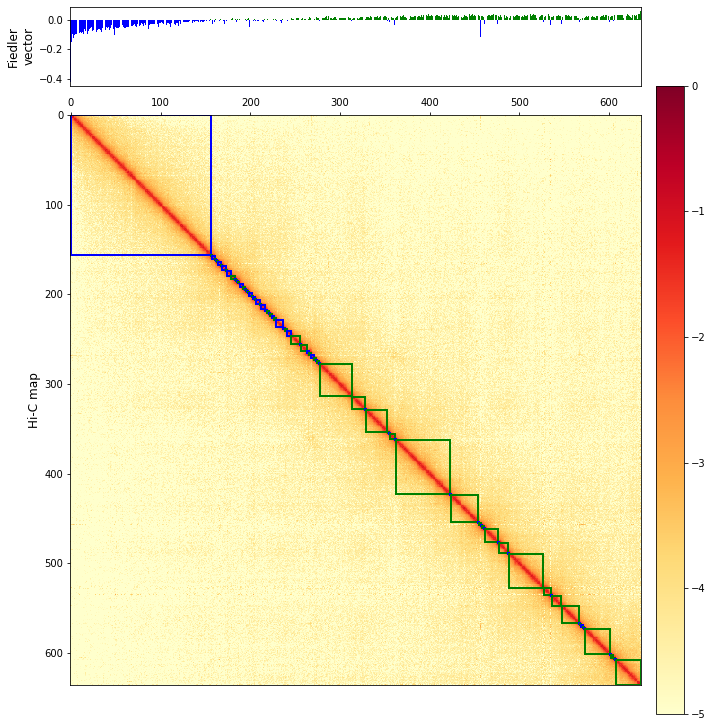

In [10]:
#Let's find TADs by Fiedler vector (graph Laplacian) approach
H = mat

tad = TAD_Laplacian()
tad.fit(H, precision=0, 
        toeplitz=True, 
        recursive=True, 
        minlimit=20,
        threshold=0.8)    #minimum number of bins after which no decomposing more
print(tad.fiedler_val_it1)
tad.visualize(transform_func=trans_func, cmap='YlOrRd', vmin=-4, vmax=0)